# NLP helps to analyse the text which takes long time to read by humans, infact we can't read hundreds of words. So, using machines to do that hectic task will reduce the time & help in enhancing the business if employee focus on other crucial tasks

In [1]:
# These IPython, PIL just to display below image. So, not a part of main goal

In [2]:
# !pip install IPython

In [3]:
import PIL

In [4]:
from PIL import Image

In [5]:
from IPython.display import display

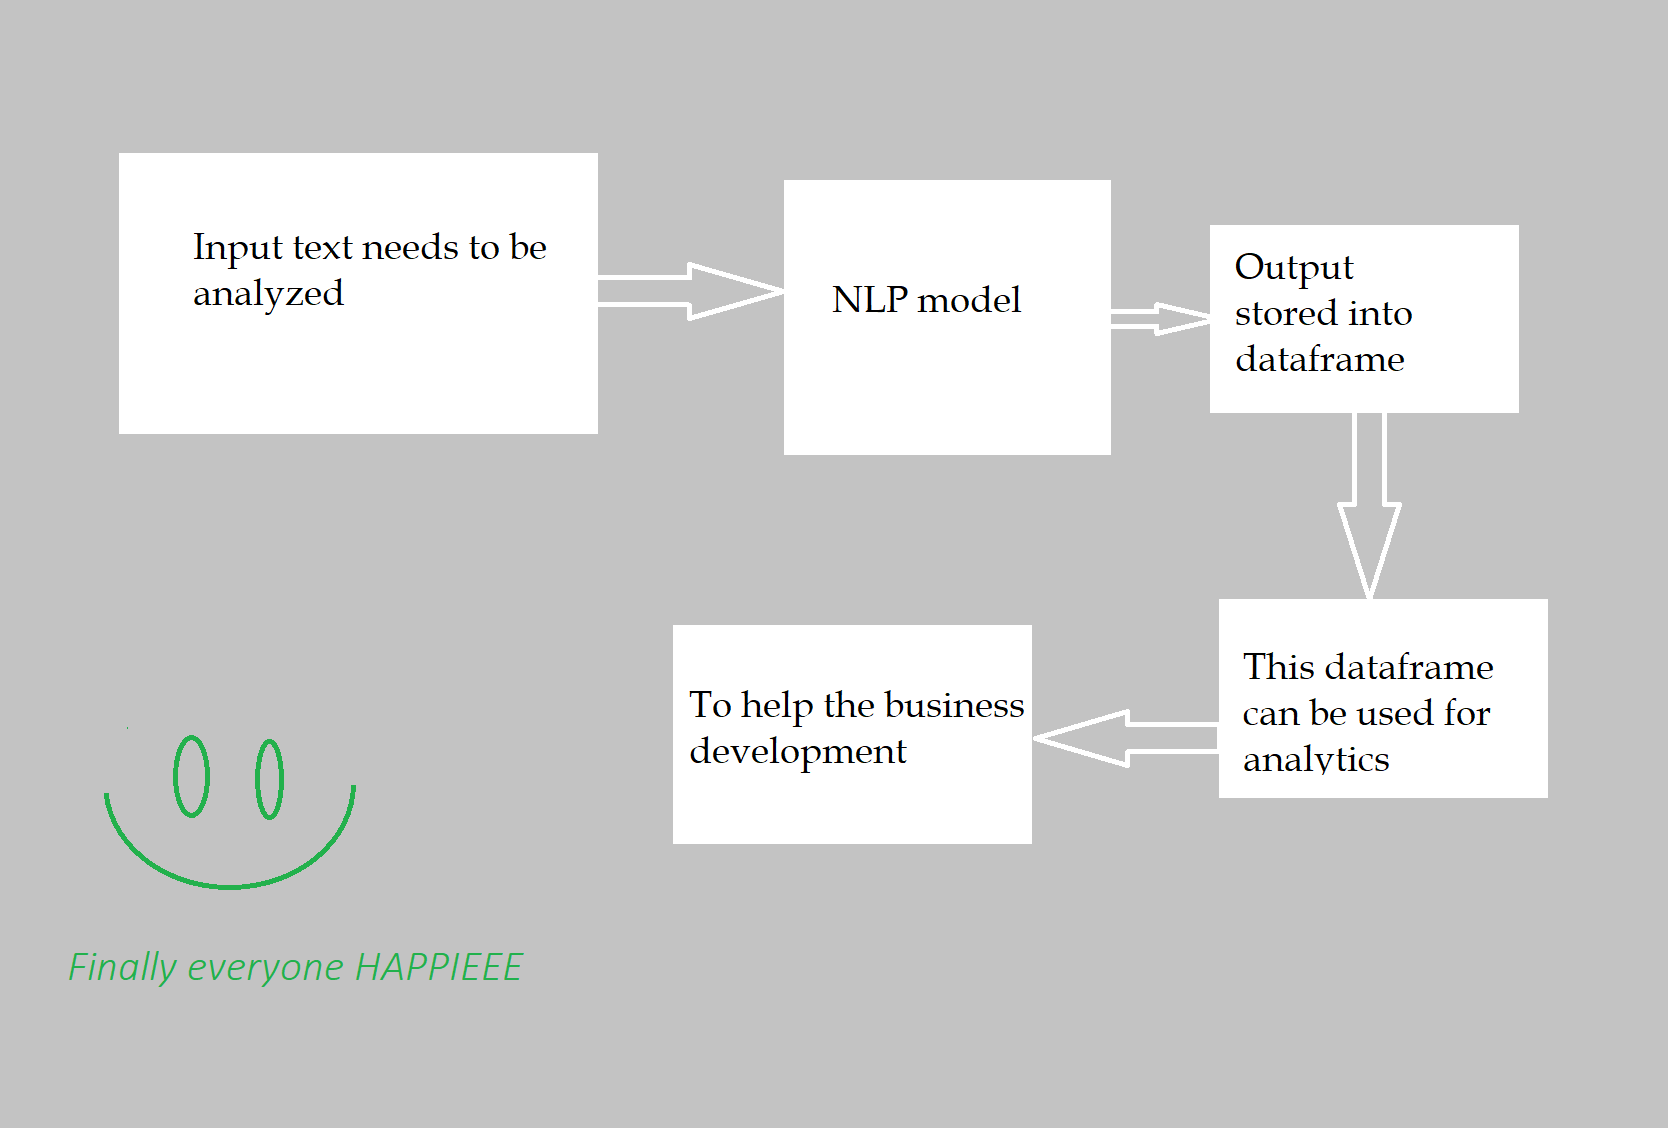

In [6]:
fp = open("NLP+Model+For+Sentiment+Analysis.png","rb")
PIL.Image.open(fp)

In [7]:
# In this notebook we deal with huggingface NLP models for sentiment analysis. But, few are not giving answers properly.
# So, finally we should decide upon some inputs until our models performs well.

In [8]:
# This file contains various NLP models to analyse the sentiment of the given input

In [9]:
# Huggingface environment

In [10]:
# import os
# os.environ["HF_ENDPOINT"] = "https://huggingface.co"

In [11]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [12]:
# To use Huggingface NLP models for SA, You should install transformers

In [13]:
# !pip install -q transformers

In [14]:
# Import it

In [15]:
import transformers

In [16]:
from transformers import pipeline

In [17]:
# "pipeline" takes care of importing the "sentiment-analysis" model here

In [18]:
sheet_sent = pipeline(model="Seethal/sentiment_analysis_generic_dataset")
sheet_sent

In [19]:
# If you'd like to use a specific model, here you go :- just give the model 

In [20]:
fin_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
fin_model

In [21]:
# If you give emoji in a sentense, some of them can be analyzed using this "emoji" module

In [22]:
# !pip3 install emoji==0.6.0

In [23]:
cardi_twi = pipeline(model='cardiffnlp/twitter-roberta-base-sentiment')
cardi_twi

In [24]:
# This model will analyze the context of the sentence

In [25]:
bhad_distil = pipeline(model = 'bhadresh-savani/distilbert-base-uncased-emotion')
bhad_distil

In [26]:
query1 = ['This is not fun']

In [27]:
print(sheet_sent(query1)[0])
print(cardi_twi(query1)[0])
print(bhad_distil(query1)[0])
print(fin_model(query1))

{'label': 'LABEL_0', 'score': 0.9875243902206421}
{'label': 'LABEL_0', 'score': 0.9763727188110352}
{'label': 'joy', 'score': 0.8323913812637329}
[{'label': 'NEG', 'score': 0.9752990007400513}]


In [28]:
# Like this we do have capability to know sadness, joy, love, anger, fear, surprise

In [29]:
# Using all of the models in a list helps for looping inside : sent_pipe, fin_model, trbs, dbue

In [30]:
model = [sheet_sent, fin_model, cardi_twi, bhad_distil]

In [31]:
model

In [64]:
# query = ['I am exhausted and frustrated with the lack of care that this management puts forth. We have asked on countless occasions since we have moved in for our lawn to be taken care of. It never gets addressed when the lawn company is here... I understand that it falls partly on the lawn staff but the condition of our yard is now a warm home for insects and bugs; not to mention we are paying monthly for it.  Additionally, the staircase is extremely unsafe and is falling apart on multiple steps. Last summer, they added some jerry-rigged welding to support the severe rusting that is occurring.  I\'m sad to see that this is happening in south Overland Park. Please look elsewhere if you want a safe and clean environment.']
query = input("Give the text to be checked : ")

Give the text to be checked : good movie is real


In [65]:
for i in range(len(model)):
    new_model = model[i](query)[0]
    model_name = model[i]
    label = new_model['label']
    score = new_model['score']
    query = query
    
    print(new_model)
    

{'label': 'LABEL_2', 'score': 0.9852354526519775}
{'label': 'POS', 'score': 0.9862819314002991}
{'label': 'LABEL_2', 'score': 0.9462896585464478}
{'label': 'joy', 'score': 0.9975001215934753}


In [34]:
# So, here we got the overall meaning of the sentence(s). But, if you'd like to do analytics you should store the outputs
# for this purpose we will use pandas dataframe and it's features to built some analytics

In [35]:
# If you'd like to store the outputs into a csv, we can use pandas dataframe concept to do that

In [36]:
# Install pandas for dataframe which eventually stores into csv for statical analysis

In [37]:
# !pip install pandas

In [38]:
import pandas as pd

In [39]:
# df = pd.DataFrame(
#     {
#         'model' : ['Fin Model'],
#         'label' : ['NEG'],
#         'score' : [0.999999],
#         'given_ip' : 'This is good'
#     }
# )

In [40]:
df

,model,label,score,given_ip
0,Fin Model,NEG,0.999999,This is good


In [41]:
df.to_csv('Ratings.csv')

In [66]:
for i in range(len(model)):
    new_model = model[i](query)[0]
    model_name = model[i]
    label = new_model['label']
    score = new_model['score']
    query = query
    df = df.append(
        {
            'model' : model_name,
            'label' : label,
            'score' : score,
            'given_ip' : query
            
        }, ignore_index=True
    )
    
    print(new_model)
    

{'label': 'LABEL_2', 'score': 0.9852354526519775}
{'label': 'POS', 'score': 0.9862819314002991}
{'label': 'LABEL_2', 'score': 0.9462896585464478}
{'label': 'joy', 'score': 0.9975001215934753}


C:\Users\bhk95\AppData\Local\Temp\ipykernel_21816\2785497649.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\bhk95\AppData\Local\Temp\ipykernel_21816\2785497649.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\bhk95\AppData\Local\Temp\ipykernel_21816\2785497649.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\bhk95\AppData\Local\Temp\ipykernel_21816\2785497649.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(


In [67]:
df.to_csv('Sentiment_Analysis.csv')

In [68]:
load = pd.read_csv('Sentiment_Analysis.csv')

In [69]:
load.head(100)

,Unnamed: 0,model,label,score,given_ip
0,0,Fin Model,NEG,0.999999,This is good
1,1,<transformers.pipelines.text_classification.Te...,LABEL_2,0.941181,good
2,2,<transformers.pipelines.text_classification.Te...,POS,0.865223,good
3,3,<transformers.pipelines.text_classification.Te...,LABEL_2,0.663025,good
4,4,<transformers.pipelines.text_classification.Te...,joy,0.990101,good
5,5,<transformers.pipelines.text_classification.Te...,LABEL_1,0.880576,late night movie is not suggested
6,6,<transformers.pipelines.text_classification.Te...,NEG,0.544714,late night movie is not suggested
7,7,<transformers.pipelines.text_classification.Te...,LABEL_0,0.642017,late night movie is not suggested
8,8,<transformers.pipelines.text_classification.Te...,anger,0.651181,late night movie is not suggested
9,9,<transformers.pipelines.text_classification.Te...,LABEL_0,0.995420,fuck this haters


In [49]:
# Like below we can extract the values

In [50]:
# We do have lot of sentiment analysis models here : https://huggingface.co/models?sort=downloads&search=sentiment+analysis

In [51]:
# Along with huggingface we do have many other models

In [52]:
# We do have lot of sentiment analysis models here : https://huggingface.co/models?sort=downloads&search=sentiment+analysis

In [53]:
# Along with huggingface we do have many other models